<a href="https://colab.research.google.com/github/SergeyB81/Portfolio-DS/blob/main/Car%20price/model_analysis_and_interpretation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Загрузка данных**

In [1]:
! gdown --id 10pq7rvk_FtY-ulQ8ldVM4QAtaR6LWt-j

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=10pq7rvk_FtY-ulQ8ldVM4QAtaR6LWt-j
To: /content/uk-used-cars.zip
100% 1.15M/1.15M [00:00<00:00, 19.0MB/s]


In [2]:
! unzip -o /content/uk-used-cars.zip -d /content/uk-used-cars

Archive:  /content/uk-used-cars.zip
  inflating: /content/uk-used-cars/audi.csv  
  inflating: /content/uk-used-cars/bmw.csv  
  inflating: /content/uk-used-cars/cclass.csv  
  inflating: /content/uk-used-cars/focus.csv  
  inflating: /content/uk-used-cars/ford.csv  
  inflating: /content/uk-used-cars/hyundi.csv  
  inflating: /content/uk-used-cars/merc.csv  
  inflating: /content/uk-used-cars/skoda.csv  
  inflating: /content/uk-used-cars/toyota.csv  
  inflating: /content/uk-used-cars/unclean cclass.csv  
  inflating: /content/uk-used-cars/unclean focus.csv  
  inflating: /content/uk-used-cars/vauxhall.csv  
  inflating: /content/uk-used-cars/vw.csv  


In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('/content/uk-used-cars/bmw.csv')

In [5]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0


# **Обучающая, тестовая и валидационная выборка**

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
train, test = train_test_split(df,train_size=0.6,random_state=42)

In [8]:
val, test = train_test_split(test,test_size=0.5,random_state=42)

# **Список фичей**



In [9]:
df.columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')

In [10]:
X = ['model', 'year', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize']

cat_features = ['model', 'transmission', 'fuelType']

y = ['price']

# **Обучение модели**

In [11]:
! pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 9.8 MB/s eta 0:00:00


In [12]:
from catboost import CatBoostRegressor

In [13]:
parameters = {'cat_features': cat_features,
              'eval_metric': 'MAPE',
              'learning_rate': 0.08,
              'random_seed':42,
              'verbose':100}

In [14]:
model = CatBoostRegressor(**parameters)

In [15]:
model.fit(train[X],train[y],eval_set=(val[X],val[y]))

0:	learn: 0.4564416	test: 0.4521294	best: 0.4521294 (0)	total: 68.3ms	remaining: 1m 8s
100:	learn: 0.0875290	test: 0.0867329	best: 0.0867329 (100)	total: 1.56s	remaining: 13.9s
200:	learn: 0.0760834	test: 0.0779235	best: 0.0779235 (200)	total: 4.63s	remaining: 18.4s
300:	learn: 0.0708670	test: 0.0740290	best: 0.0740290 (300)	total: 6.72s	remaining: 15.6s
400:	learn: 0.0676240	test: 0.0718814	best: 0.0718814 (400)	total: 8.68s	remaining: 13s
500:	learn: 0.0654070	test: 0.0709221	best: 0.0708594 (496)	total: 10.9s	remaining: 10.8s
600:	learn: 0.0638577	test: 0.0704606	best: 0.0704490 (599)	total: 12.6s	remaining: 8.38s
700:	learn: 0.0622969	test: 0.0698226	best: 0.0698226 (700)	total: 14.3s	remaining: 6.1s
800:	learn: 0.0609583	test: 0.0694169	best: 0.0694004 (791)	total: 17.3s	remaining: 4.3s
900:	learn: 0.0596089	test: 0.0689968	best: 0.0689945 (895)	total: 18.4s	remaining: 2.02s
999:	learn: 0.0584626	test: 0.0686829	best: 0.0686377 (993)	total: 19.1s	remaining: 0us

bestTest = 0.06863

# **Проверка на тестовой выборке**

In [16]:
test['price_pred'] = model.predict(test[X])

In [17]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

In [18]:
def error(y_true,y_pred):
  print(mean_absolute_error(y_true,y_pred))
  print(mean_absolute_percentage_error(y_true,y_pred))

In [19]:
error(test['price'],test['price_pred'])

1537.5600657036578
0.0724718966452533


# **Анализ ошибок**

In [20]:
test['error'] = test['price_pred'] - test['price']

In [21]:
test

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred,error
4984,X6,2019,52990,Semi-Auto,3086,Diesel,145,34.9,3.0,56789.268481,3799.268481
4880,X1,2018,24081,Semi-Auto,13245,Diesel,150,60.1,2.0,22236.888207,-1844.111793
9132,1 Series,2016,12999,Automatic,68949,Petrol,200,43.5,2.0,13529.705791,530.705791
6451,1 Series,2020,11995,Semi-Auto,10,Petrol,150,34.5,2.0,31815.676673,19820.676673
7199,3 Series,2020,29875,Semi-Auto,150,Petrol,145,42.2,2.0,35549.276658,5674.276658
...,...,...,...,...,...,...,...,...,...,...,...
9627,3 Series,2015,14999,Automatic,78680,Diesel,160,52.3,3.0,14193.617089,-805.382911
6096,4 Series,2019,29676,Automatic,7365,Petrol,145,41.5,3.0,30819.807549,1143.807549
1747,5 Series,2019,30570,Automatic,3067,Hybrid,145,49.6,2.0,29782.428096,-787.571904
4023,3 Series,2016,14999,Automatic,70054,Hybrid,0,148.7,2.0,13799.641665,-1199.358335


In [22]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')

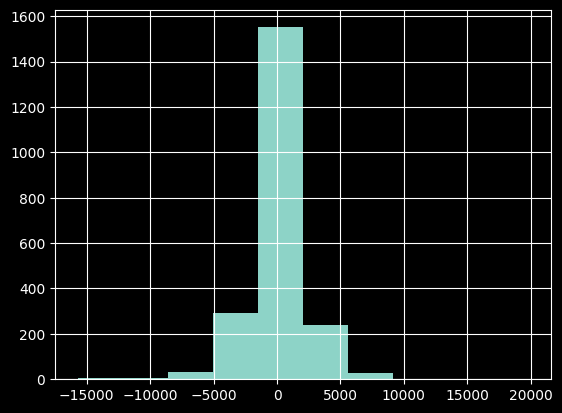

In [23]:
test['error'].hist();

In [24]:
import numpy as np

In [25]:
np.mean([-2000,2200])

np.float64(100.0)

In [26]:
test['error'].mean()

np.float64(122.08788795070966)

# **Абсолютная ошибка**


In [27]:
test['error_abs'] = abs(test['error'])

In [28]:
test

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred,error,error_abs
4984,X6,2019,52990,Semi-Auto,3086,Diesel,145,34.9,3.0,56789.268481,3799.268481,3799.268481
4880,X1,2018,24081,Semi-Auto,13245,Diesel,150,60.1,2.0,22236.888207,-1844.111793,1844.111793
9132,1 Series,2016,12999,Automatic,68949,Petrol,200,43.5,2.0,13529.705791,530.705791,530.705791
6451,1 Series,2020,11995,Semi-Auto,10,Petrol,150,34.5,2.0,31815.676673,19820.676673,19820.676673
7199,3 Series,2020,29875,Semi-Auto,150,Petrol,145,42.2,2.0,35549.276658,5674.276658,5674.276658
...,...,...,...,...,...,...,...,...,...,...,...,...
9627,3 Series,2015,14999,Automatic,78680,Diesel,160,52.3,3.0,14193.617089,-805.382911,805.382911
6096,4 Series,2019,29676,Automatic,7365,Petrol,145,41.5,3.0,30819.807549,1143.807549,1143.807549
1747,5 Series,2019,30570,Automatic,3067,Hybrid,145,49.6,2.0,29782.428096,-787.571904,787.571904
4023,3 Series,2016,14999,Automatic,70054,Hybrid,0,148.7,2.0,13799.641665,-1199.358335,1199.358335


<Axes: >

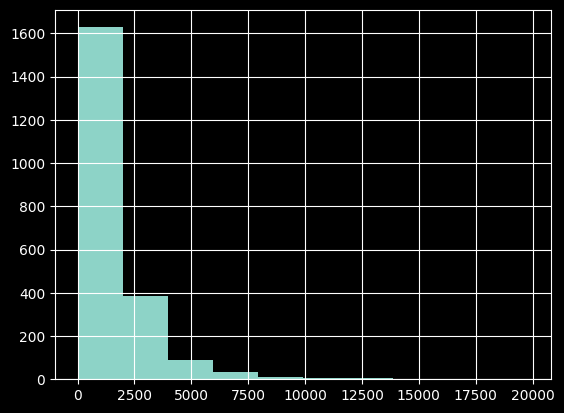

In [29]:
test['error_abs'].hist()

In [30]:
test['error_abs'].describe()

,error_abs
count,2157.000000
mean,1537.560066
std,1676.859544
min,0.083199
25%,489.152540
50%,1073.305750
75%,1946.619471
max,19820.676673


In [31]:
test.sort_values('error_abs',ascending=False).head(10)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred,error,error_abs
6451,1 Series,2020,11995,Semi-Auto,10,Petrol,150,34.5,2.0,31815.676673,19820.676673,19820.676673
1244,4 Series,2020,47550,Semi-Auto,101,Diesel,145,60.1,2.0,31822.814760,-15727.185240,15727.185240
6866,4 Series,2020,42520,Semi-Auto,102,Diesel,145,65.7,2.0,28016.370190,-14503.629810,14503.629810
6592,M5,2019,70995,Semi-Auto,23,Petrol,145,24.1,4.4,85092.283023,14097.283023,14097.283023
2315,X2,2019,44980,Semi-Auto,500,Diesel,145,58.9,2.0,32052.149452,-12927.850548,12927.850548
6270,M4,2020,59999,Semi-Auto,3000,Petrol,150,28.5,3.0,47193.043921,-12805.956079,12805.956079
947,2 Series,2015,11998,Semi-Auto,30738,Diesel,20,68.9,2.0,24663.932331,12665.932331,12665.932331
6759,4 Series,2020,42495,Semi-Auto,18,Diesel,150,58.9,2.0,30133.732400,-12361.267600,12361.267600
4833,M4,2019,58662,Automatic,3395,Petrol,145,34.0,3.0,46802.901943,-11859.098057,11859.098057
6215,M4,2018,53999,Semi-Auto,8725,Petrol,145,33.6,3.0,42513.071957,-11485.928043,11485.928043


# **Анализ абсолютной и относительной ошибки**

In [32]:
test['price_group'] = pd.qcut(test['price'],5)

In [33]:
test

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred,error,error_abs,price_group
4984,X6,2019,52990,Semi-Auto,3086,Diesel,145,34.9,3.0,56789.268481,3799.268481,3799.268481,"(29990.0, 74990.0]"
4880,X1,2018,24081,Semi-Auto,13245,Diesel,150,60.1,2.0,22236.888207,-1844.111793,1844.111793,"(23131.6, 29990.0]"
9132,1 Series,2016,12999,Automatic,68949,Petrol,200,43.5,2.0,13529.705791,530.705791,530.705791,"(1199.999, 13995.0]"
6451,1 Series,2020,11995,Semi-Auto,10,Petrol,150,34.5,2.0,31815.676673,19820.676673,19820.676673,"(1199.999, 13995.0]"
7199,3 Series,2020,29875,Semi-Auto,150,Petrol,145,42.2,2.0,35549.276658,5674.276658,5674.276658,"(23131.6, 29990.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9627,3 Series,2015,14999,Automatic,78680,Diesel,160,52.3,3.0,14193.617089,-805.382911,805.382911,"(13995.0, 18500.0]"
6096,4 Series,2019,29676,Automatic,7365,Petrol,145,41.5,3.0,30819.807549,1143.807549,1143.807549,"(23131.6, 29990.0]"
1747,5 Series,2019,30570,Automatic,3067,Hybrid,145,49.6,2.0,29782.428096,-787.571904,787.571904,"(29990.0, 74990.0]"
4023,3 Series,2016,14999,Automatic,70054,Hybrid,0,148.7,2.0,13799.641665,-1199.358335,1199.358335,"(13995.0, 18500.0]"


In [34]:
t = test.groupby('price_group')[['error_abs','error']].agg(['count','mean'])

<ipython-input-34-464a082dd050>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  t = test.groupby('price_group')[['error_abs','error']].agg(['count','mean'])


In [35]:
t

error_abs              error            
                        count         mean count        mean
price_group                                                 
(1199.999, 13995.0]       435   911.712080   435  462.229738
(13995.0, 18500.0]        432  1151.556512   432  281.411969
(18500.0, 23131.6]        427  1318.846517   427  254.475675
(23131.6, 29990.0]        432  1749.723698   432  378.241254
(29990.0, 74990.0]        431  2560.143373   431 -768.811293

In [36]:
t.columns = [('   error_abs', 'count'),
            ('error_abs',  'mean'),
            (    'error', 'count'),
            (    'error',  'mean')]

In [37]:
t.columns.values

array([('   error_abs', 'count'), ('error_abs', 'mean'),
       ('error', 'count'), ('error', 'mean')], dtype=object)

In [38]:
t.columns = ['_'.join(col).strip() for col in t.columns.values]

In [39]:
t.columns

Index(['error_abs_count', 'error_abs_mean', 'error_count', 'error_mean'], dtype='object')

In [40]:
t.columns.values

array(['error_abs_count', 'error_abs_mean', 'error_count', 'error_mean'],
      dtype=object)

In [41]:

t

,error_abs_count,error_abs_mean,error_count,error_mean
price_group,,,,
"(1199.999, 13995.0]",435,911.712080,435,462.229738
"(13995.0, 18500.0]",432,1151.556512,432,281.411969
"(18500.0, 23131.6]",427,1318.846517,427,254.475675
"(23131.6, 29990.0]",432,1749.723698,432,378.241254
"(29990.0, 74990.0]",431,2560.143373,431,-768.811293


In [42]:
t = t.drop('error_count',axis=1)

In [43]:
t['mean_error_diff'] = t['error_abs_mean'] - test['error_abs'].mean()

In [44]:
t['mean_error'] = test['error_abs'].mean()

In [45]:
import seaborn as sns
cm = sns.dark_palette("red", as_cmap=True)

In [46]:
t.style.background_gradient(cmap=cm,subset=['mean_error_diff'])

,error_abs_count,error_abs_mean,error_mean,mean_error_diff,mean_error
price_group,,,,,
"(1199.999, 13995.0]",435,911.712080,462.229738,-625.847985,1537.560066
"(13995.0, 18500.0]",432,1151.556512,281.411969,-386.003554,1537.560066
"(18500.0, 23131.6]",427,1318.846517,254.475675,-218.713549,1537.560066
"(23131.6, 29990.0]",432,1749.723698,378.241254,212.163632,1537.560066
"(29990.0, 74990.0]",431,2560.143373,-768.811293,1022.583307,1537.560066


# **Анализ абсолютной ошибки относительно других переменных**

In [47]:
test

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred,error,error_abs,price_group
4984,X6,2019,52990,Semi-Auto,3086,Diesel,145,34.9,3.0,56789.268481,3799.268481,3799.268481,"(29990.0, 74990.0]"
4880,X1,2018,24081,Semi-Auto,13245,Diesel,150,60.1,2.0,22236.888207,-1844.111793,1844.111793,"(23131.6, 29990.0]"
9132,1 Series,2016,12999,Automatic,68949,Petrol,200,43.5,2.0,13529.705791,530.705791,530.705791,"(1199.999, 13995.0]"
6451,1 Series,2020,11995,Semi-Auto,10,Petrol,150,34.5,2.0,31815.676673,19820.676673,19820.676673,"(1199.999, 13995.0]"
7199,3 Series,2020,29875,Semi-Auto,150,Petrol,145,42.2,2.0,35549.276658,5674.276658,5674.276658,"(23131.6, 29990.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9627,3 Series,2015,14999,Automatic,78680,Diesel,160,52.3,3.0,14193.617089,-805.382911,805.382911,"(13995.0, 18500.0]"
6096,4 Series,2019,29676,Automatic,7365,Petrol,145,41.5,3.0,30819.807549,1143.807549,1143.807549,"(23131.6, 29990.0]"
1747,5 Series,2019,30570,Automatic,3067,Hybrid,145,49.6,2.0,29782.428096,-787.571904,787.571904,"(29990.0, 74990.0]"
4023,3 Series,2016,14999,Automatic,70054,Hybrid,0,148.7,2.0,13799.641665,-1199.358335,1199.358335,"(13995.0, 18500.0]"


In [48]:
t = test.groupby('year')[['error_abs', 'error']].agg(['count', 'mean'])

In [49]:
t.columns = ['_'.join(col).strip() for col in t.columns.values]

In [50]:
t = t.drop('error_count',axis=1)

In [51]:
t['mean_error_diff'] = t['error_abs_mean'] - test['error_abs'].mean()

In [52]:
t['mean_error'] = test['error_abs'].mean()

In [53]:
t.style.background_gradient(cmap=cm,subset=['mean_error_diff'])

,error_abs_count,error_abs_mean,error_mean,mean_error_diff,mean_error
year,,,,,
1996,1,6339.136209,6339.136209,4801.576144,1537.560066
1999,1,890.056901,890.056901,-647.503164,1537.560066
2001,1,927.316449,927.316449,-610.243617,1537.560066
2002,2,2175.440983,-1069.308819,637.880917,1537.560066
2003,1,1482.424637,-1482.424637,-55.135428,1537.560066
2004,4,1902.279284,-305.313519,364.719218,1537.560066
2006,3,1660.249510,775.274447,122.689445,1537.560066
2007,2,1003.062275,1003.062275,-534.497791,1537.560066
2008,4,3182.698112,3182.698112,1645.138047,1537.560066


In [54]:
def print_error(col):
  t = test.groupby(col)[['error_abs', 'error']].agg(['count', 'mean'])
  t.columns = ['_'.join(col).strip() for col in t.columns.values]
  t = t.drop('error_count',axis=1)
  t['mean_error_diff'] = t['error_abs_mean'] - test['error_abs'].mean()
  t['mean_error'] = test['error_abs'].mean()
  display(t.style.background_gradient(cmap=cm,subset=['mean_error_diff']))

In [55]:
print_error('year')

,error_abs_count,error_abs_mean,error_mean,mean_error_diff,mean_error
year,,,,,
1996,1,6339.136209,6339.136209,4801.576144,1537.560066
1999,1,890.056901,890.056901,-647.503164,1537.560066
2001,1,927.316449,927.316449,-610.243617,1537.560066
2002,2,2175.440983,-1069.308819,637.880917,1537.560066
2003,1,1482.424637,-1482.424637,-55.135428,1537.560066
2004,4,1902.279284,-305.313519,364.719218,1537.560066
2006,3,1660.249510,775.274447,122.689445,1537.560066
2007,2,1003.062275,1003.062275,-534.497791,1537.560066
2008,4,3182.698112,3182.698112,1645.138047,1537.560066


In [56]:
test

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred,error,error_abs,price_group
4984,X6,2019,52990,Semi-Auto,3086,Diesel,145,34.9,3.0,56789.268481,3799.268481,3799.268481,"(29990.0, 74990.0]"
4880,X1,2018,24081,Semi-Auto,13245,Diesel,150,60.1,2.0,22236.888207,-1844.111793,1844.111793,"(23131.6, 29990.0]"
9132,1 Series,2016,12999,Automatic,68949,Petrol,200,43.5,2.0,13529.705791,530.705791,530.705791,"(1199.999, 13995.0]"
6451,1 Series,2020,11995,Semi-Auto,10,Petrol,150,34.5,2.0,31815.676673,19820.676673,19820.676673,"(1199.999, 13995.0]"
7199,3 Series,2020,29875,Semi-Auto,150,Petrol,145,42.2,2.0,35549.276658,5674.276658,5674.276658,"(23131.6, 29990.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9627,3 Series,2015,14999,Automatic,78680,Diesel,160,52.3,3.0,14193.617089,-805.382911,805.382911,"(13995.0, 18500.0]"
6096,4 Series,2019,29676,Automatic,7365,Petrol,145,41.5,3.0,30819.807549,1143.807549,1143.807549,"(23131.6, 29990.0]"
1747,5 Series,2019,30570,Automatic,3067,Hybrid,145,49.6,2.0,29782.428096,-787.571904,787.571904,"(29990.0, 74990.0]"
4023,3 Series,2016,14999,Automatic,70054,Hybrid,0,148.7,2.0,13799.641665,-1199.358335,1199.358335,"(13995.0, 18500.0]"


In [57]:

print_error('transmission')

,error_abs_count,error_abs_mean,error_mean,mean_error_diff,mean_error
transmission,,,,,
Automatic,695,1494.208611,36.406949,-43.351455,1537.560066
Manual,504,1079.145745,142.507574,-458.414320,1537.560066
Semi-Auto,958,1810.180189,173.504100,272.620124,1537.560066


In [58]:
test['mileage_group'] = pd.qcut(test['mileage'],5)

In [59]:
print_error('mileage_group')

<ipython-input-54-abb4d47b0374>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  t = test.groupby(col)[['error_abs', 'error']].agg(['count', 'mean'])


,error_abs_count,error_abs_mean,error_mean,mean_error_diff,mean_error
mileage_group,,,,,
"(0.999, 4063.2]",432,2433.845556,293.238143,896.285490,1537.560066
"(4063.2, 9825.4]",431,1725.080432,67.411269,187.520367,1537.560066
"(9825.4, 24299.0]",432,1395.285364,65.804632,-142.274702,1537.560066
"(24299.0, 43519.8]",430,1141.553935,13.742028,-396.006130,1537.560066
"(43519.8, 190000.0]",432,990.635754,169.615201,-546.924311,1537.560066


In [60]:
print_error('fuelType')

,error_abs_count,error_abs_mean,error_mean,mean_error_diff,mean_error
fuelType,,,,,
Diesel,1394,1437.061117,98.276014,-100.498949,1537.560066
Hybrid,64,1558.853198,-352.158801,21.293132,1537.560066
Other,5,944.136410,-941.902308,-593.423655,1537.560066
Petrol,694,1741.738585,221.317702,204.178520,1537.560066


In [61]:
test

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred,error,error_abs,price_group,mileage_group
4984,X6,2019,52990,Semi-Auto,3086,Diesel,145,34.9,3.0,56789.268481,3799.268481,3799.268481,"(29990.0, 74990.0]","(0.999, 4063.2]"
4880,X1,2018,24081,Semi-Auto,13245,Diesel,150,60.1,2.0,22236.888207,-1844.111793,1844.111793,"(23131.6, 29990.0]","(9825.4, 24299.0]"
9132,1 Series,2016,12999,Automatic,68949,Petrol,200,43.5,2.0,13529.705791,530.705791,530.705791,"(1199.999, 13995.0]","(43519.8, 190000.0]"
6451,1 Series,2020,11995,Semi-Auto,10,Petrol,150,34.5,2.0,31815.676673,19820.676673,19820.676673,"(1199.999, 13995.0]","(0.999, 4063.2]"
7199,3 Series,2020,29875,Semi-Auto,150,Petrol,145,42.2,2.0,35549.276658,5674.276658,5674.276658,"(23131.6, 29990.0]","(0.999, 4063.2]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9627,3 Series,2015,14999,Automatic,78680,Diesel,160,52.3,3.0,14193.617089,-805.382911,805.382911,"(13995.0, 18500.0]","(43519.8, 190000.0]"
6096,4 Series,2019,29676,Automatic,7365,Petrol,145,41.5,3.0,30819.807549,1143.807549,1143.807549,"(23131.6, 29990.0]","(4063.2, 9825.4]"
1747,5 Series,2019,30570,Automatic,3067,Hybrid,145,49.6,2.0,29782.428096,-787.571904,787.571904,"(29990.0, 74990.0]","(0.999, 4063.2]"
4023,3 Series,2016,14999,Automatic,70054,Hybrid,0,148.7,2.0,13799.641665,-1199.358335,1199.358335,"(13995.0, 18500.0]","(43519.8, 190000.0]"


In [62]:
test['tax_group'] = pd.qcut(test['tax'],5,duplicates='drop')

In [63]:
print_error(test['tax_group'])

<ipython-input-54-abb4d47b0374>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  t = test.groupby(col)[['error_abs', 'error']].agg(['count', 'mean'])


,error_abs_count,error_abs_mean,error_mean,mean_error_diff,mean_error
tax_group,,,,,
"(-0.001, 125.0]",512,823.722414,91.176598,-713.837651,1537.560066
"(125.0, 145.0]",1131,1807.424736,117.301327,269.864670,1537.560066
"(145.0, 150.0]",252,1707.575874,118.514950,170.015808,1537.560066
"(150.0, 580.0]",262,1604.063700,206.593848,66.503634,1537.560066


In [64]:
test.groupby('tax_group')[['price', 'year']].agg(['count', 'mean'])

<ipython-input-64-d4b63bcdfaee>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  test.groupby('tax_group')[['price', 'year']].agg(['count', 'mean'])


price                year             
                count          mean count         mean
tax_group                                             
(-0.001, 125.0]   512  13264.859375   512  2015.365234
(125.0, 145.0]   1131  27536.747126  1131  2018.382847
(145.0, 150.0]    252  25288.376984   252  2018.166667
(150.0, 580.0]    262  18207.576336   262  2014.118321

In [65]:
test['mpg_group'] = pd.qcut(test['mpg'],5)


In [67]:
print_error('mpg_group')

<ipython-input-54-abb4d47b0374>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  t = test.groupby(col)[['error_abs', 'error']].agg(['count', 'mean'])


,error_abs_count,error_abs_mean,error_mean,mean_error_diff,mean_error
mpg_group,,,,,
"(5.499, 42.2]",444,2159.412978,227.429403,621.852912,1537.560066
"(42.2, 50.4]",487,1664.200649,361.406267,126.640583,1537.560066
"(50.4, 55.4]",380,1517.852124,46.756860,-19.707942,1537.560066
"(55.4, 64.2]",449,1238.191642,-105.163252,-299.368424,1537.560066
"(64.2, 470.8]",397,1044.181685,39.825594,-493.378380,1537.560066


In [68]:
test.groupby('mpg_group')[['price', 'year']].agg(['count', 'mean'])

<ipython-input-68-d6aaafa9b778>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  test.groupby('mpg_group')[['price', 'year']].agg(['count', 'mean'])


price                year             
              count          mean count         mean
mpg_group                                           
(5.499, 42.2]   444  32876.211712   444  2017.743243
(42.2, 50.4]    487  23569.260780   487  2017.451745
(50.4, 55.4]    380  21489.018421   380  2017.194737
(55.4, 64.2]    449  18276.222717   449  2016.443207
(64.2, 470.8]   397  16704.297229   397  2016.727960

In [69]:
test.groupby('year')['mpg'].agg(['count', 'mean'])

,count,mean
year,,
1996,1,26.400000
1999,1,31.000000
2001,1,27.700000
2002,2,28.950000
2003,1,26.400000
2004,4,27.125000
2006,3,37.566667
2007,2,36.850000
2008,4,41.075000


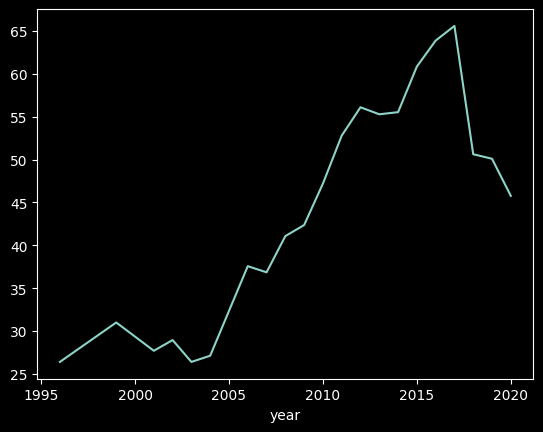

In [73]:
test.groupby('year')['mpg'].mean().plot();

In [74]:
test['engineSize'].value_counts()

,count
engineSize,
2.0,1323
3.0,495
1.5,278
1.6,24
4.4,15
0.0,7
2.5,4
2.2,3
2.8,2


In [75]:
test['engine_group'] = pd.cut(test['engineSize'],[0,1.5,2,float('inf')])

In [76]:
print_error('engine_group')

<ipython-input-54-abb4d47b0374>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  t = test.groupby(col)[['error_abs', 'error']].agg(['count', 'mean'])


,error_abs_count,error_abs_mean,error_mean,mean_error_diff,mean_error
engine_group,,,,,
"(0.0, 1.5]",279,1135.531674,149.248281,-402.028392,1537.560066
"(1.5, 2.0]",1347,1423.236324,60.610112,-114.323742,1537.560066
"(2.0, inf]",524,2049.868683,265.297889,512.308617,1537.560066


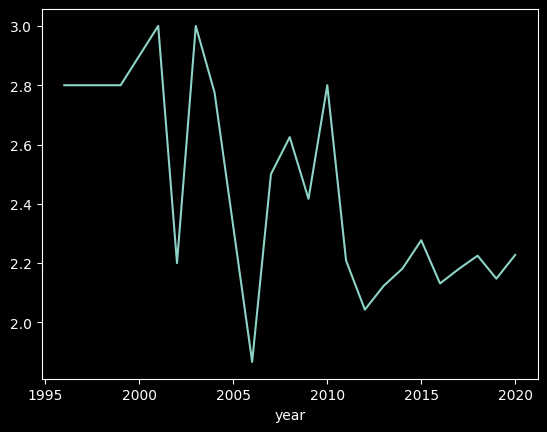

In [79]:
test.groupby('year')['engineSize'].mean().plot();